In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

import time

txt = pd.read_csv('word_embedding.csv')

## 데이터 로딩 후 kmeasn로 군집화

x = StandardScaler().fit_transform(txt.iloc[:,1:])

kmeans = KMeans(n_clusters=10, random_state=0).fit(x)

lab =kmeans.labels_

### PCA 전 10개의 군집으로 Kmeans 시각화

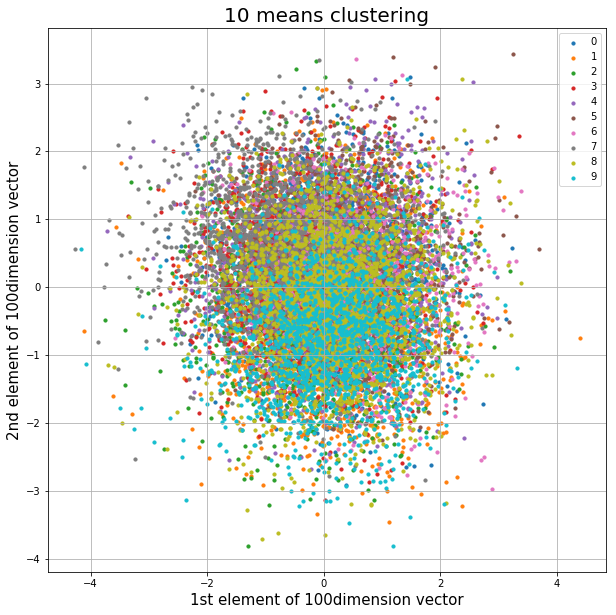

In [14]:
## 원시 100차원 데이터로 시각화

import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('1st element of 100dimension vector', fontsize = 15)
ax.set_ylabel('2nd element of 100dimension vector', fontsize = 15)
ax.set_title('10 means clustering', fontsize = 20)

# 군집별로 scatter 그리면 이쁜 색으로 그려짐
for i in range(10):
    ax.scatter(x[lab==i,0],x[lab==i,1], s = 10)

ax.legend(range(10))
ax.grid()

### PCA 적용후 시각화

In [3]:
time_start = time.time()
real_pca = PCA(2)
real_pca_features = real_pca.fit_transform(x)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))


PCA done! Time elapsed: 0.11058616638183594 seconds


In [4]:
real_pca_features.shape

(16577, 2)

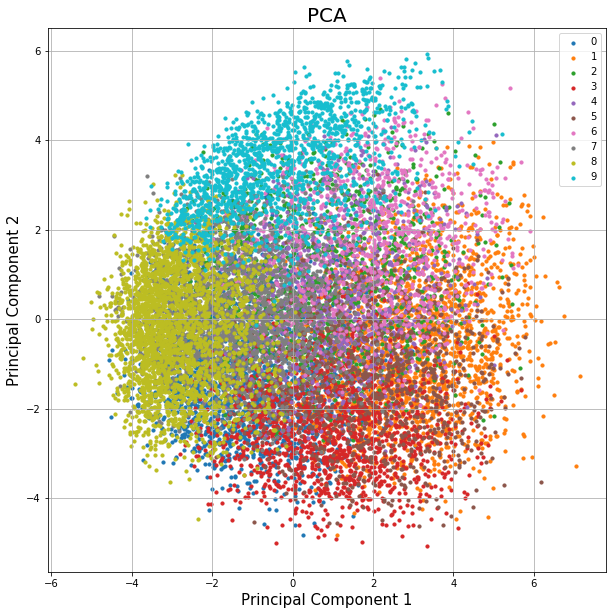

In [15]:
## PCA 차원 축소후 2차원 데이터로  kmeans 시각화 


fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)


for i in range(10):
    ax.scatter(real_pca_features[lab==i,0],real_pca_features[lab==i,1], s = 10)

ax.legend(range(10))
ax.grid()

### t-SNE 적용후 시각화

In [7]:
time_start = time.time()

tsne = TSNE(random_state=5, n_components=2, perplexity=40, n_iter=300).fit_transform(x)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


t-SNE done! Time elapsed: 297.2919900417328 seconds


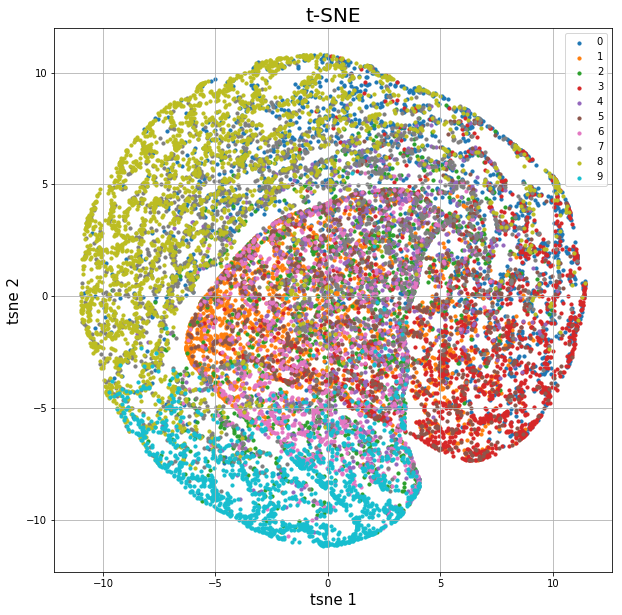

In [16]:
## TSNE 차원 축소후 2차원 데이터로  kmeans 시각화 

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('tsne 1', fontsize = 15)
ax.set_ylabel('tsne 2', fontsize = 15)
ax.set_title('t-SNE', fontsize = 20)


for i in range(10):
    ax.scatter(tsne[lab==i,0],tsne[lab==i,1], s = 10)

ax.legend(range(10))
ax.grid()

### PCA로 차원 축소후 TSNE 적용

In [10]:
time_start = time.time()

tsne = TSNE(random_state=5, n_components=2, perplexity=40, n_iter=300).fit_transform(real_pca_features)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


t-SNE done! Time elapsed: 67.8397228717804 seconds


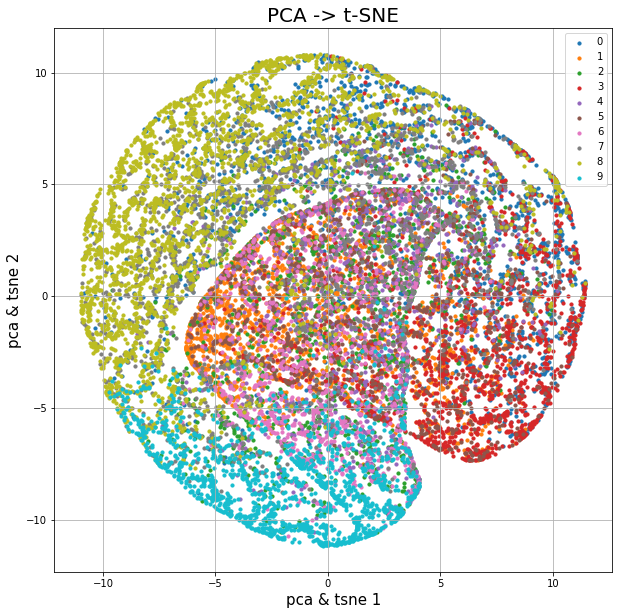

In [17]:
## PCA -> TSNE 차원 축소후 2차원 데이터로  kmeans 시각화 

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('pca & tsne 1', fontsize = 15)
ax.set_ylabel('pca & tsne 2', fontsize = 15)
ax.set_title('PCA -> t-SNE', fontsize = 20)


for i in range(10):
    ax.scatter(tsne[lab==i,0],tsne[lab==i,1], s = 10)

ax.legend(range(10))
ax.grid()